In [53]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xg 
import graphviz

from sklearn import svm

In [3]:
df=pd.read_csv('data/data_clean.csv')

In [4]:
df

,SIBS_log,DEGREE,PADEG,MADEG,MAJOR1,SEX,DIPGED,FAMILY16,PARBORN,GRANBORN,POLVIEWS,INCOME,MAJOR1_cat,FAMILY16_cat,PARBORN_cat,POLVIEWS_cat
0,0.693147,1,3,4,NaN,1,NaN,MOTHER & FATHER,BOTH IN U.S,1.0,SLGHTLY CONSERVATIVE,8000,-1,6,0,5
1,1.945910,0,1,1,NaN,0,NaN,MOTHER & FATHER,BOTH IN U.S,1.0,LIBERAL,7000,-1,6,0,3
2,0.000000,2,1,1,NaN,1,NaN,MOTHER & FATHER,BOTH IN U.S,5.0,SLIGHTLY LIBERAL,50000,-1,6,0,6
3,2.079442,1,1,1,NaN,1,NaN,MOTHER,BOTH IN U.S,5.0,LIBERAL,75000,-1,5,0,3
4,1.386294,1,3,1,NaN,1,NaN,MOTHER & FATHER,BOTH IN U.S,1.0,SLGHTLY CONSERVATIVE,60000,-1,6,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,0.000000,0,0,0,BUSINESS ADMINISTRATION,0,High School diploma,MOTHER & FATHER,BOTH IN U.S,5.0,LIBERAL,40000,10,6,0,3
3594,1.098612,0,1,1,HEALTH,0,High School diploma,MOTHER & FATHER,BOTH IN U.S,5.0,CONSERVATIVE,40000,39,6,0,0
3595,1.098612,2,3,2,ENGINEERING,0,High School diploma,MOTHER & FATHER,BOTH IN U.S,2.0,EXTREMELY LIBERAL,50000,22,6,0,1
3596,0.693147,0,1,1,Information technology,0,High School diploma,MOTHER & FATHER,BOTH IN U.S,5.0,CONSERVATIVE,60000,44,6,0,0


In [5]:
columns_in_use = ['SIBS_log','DEGREE','PADEG', 'MADEG','SEX','FAMILY16_cat','PARBORN_cat','GRANBORN', 'POLVIEWS_cat', 'MAJOR1_cat', 'INCOME']

In [7]:
df = df[columns_in_use].loc[df['MAJOR1_cat']!= -1]

In [8]:
df

,SIBS_log,DEGREE,PADEG,MADEG,SEX,FAMILY16_cat,PARBORN_cat,GRANBORN,POLVIEWS_cat,MAJOR1_cat,INCOME
2325,0.000000,1,2,1,0,6,0,5.0,3,65,30000
2326,1.098612,1,1,1,0,5,0,5.0,3,48,6000
2327,1.386294,0,1,1,0,0,5,4.0,3,39,90000
2328,1.609438,1,4,4,1,6,5,4.0,6,25,60000
2329,1.098612,1,1,3,0,5,2,2.0,3,63,30000
...,...,...,...,...,...,...,...,...,...,...,...
3593,0.000000,0,0,0,0,6,0,5.0,3,10,40000
3594,1.098612,0,1,1,0,6,0,5.0,0,39,40000
3595,1.098612,2,3,2,0,6,0,2.0,1,22,50000
3596,0.693147,0,1,1,0,6,0,5.0,0,44,60000


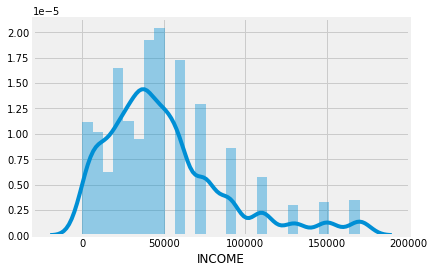

In [9]:
sns.distplot(df["INCOME"])

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X

,SIBS_log,DEGREE,PADEG,MADEG,SEX,FAMILY16_cat,PARBORN_cat,GRANBORN,POLVIEWS_cat,MAJOR1_cat
2325,0.000000,1,2,1,0,6,0,5.0,3,65
2326,1.098612,1,1,1,0,5,0,5.0,3,48
2327,1.386294,0,1,1,0,0,5,4.0,3,39
2328,1.609438,1,4,4,1,6,5,4.0,6,25
2329,1.098612,1,1,3,0,5,2,2.0,3,63
...,...,...,...,...,...,...,...,...,...,...
3593,0.000000,0,0,0,0,6,0,5.0,3,10
3594,1.098612,0,1,1,0,6,0,5.0,0,39
3595,1.098612,2,3,2,0,6,0,2.0,1,22
3596,0.693147,0,1,1,0,6,0,5.0,0,44


In [12]:
y

2325    30000
2326     6000
2327    90000
2328    60000
2329    30000
        ...  
3593    40000
3594    40000
3595    50000
3596    60000
3597     8000
Name: INCOME, Length: 1269, dtype: int64

## Linear regression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [57]:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_r2_score = r2_score(y_test, y_hat_test)

In [58]:
test_mse, test_rmse, test_r2_score

(1306748883.1184933, 36148.98177153118, 0.13872306672397905)

In [59]:
print(linreg.intercept_)
print(linreg.coef_)

35793.95515103882
[-2.75480938e+03  1.45000890e+04  2.55338049e+03 -7.73302653e+02
  1.27662403e+04 -1.41735575e+01 -1.61416222e+02 -1.09374603e+03
  7.95458939e+02 -1.55597850e+02]


## XGBoost

In [32]:
data_dmatrix = xg.DMatrix(data=X,label=y)

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 123) 

# Instantiation 
xg_reg = xg.XGBRegressor(objective ='reg:squarederror', colsample_bylevel = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
  
# Fitting the model 
xg_reg.fit(train_X, train_y) 
  
# Predict the model 
y_hat_test = xg_reg.predict(test_X) 
  
# RMSE Computation 
test_mse = mean_squared_error(y_test, y_hat_test)

rmse = np.sqrt(test_mse) 

print("RMSE : % f" %(rmse)) 


RMSE :  41344.952264


In [85]:
params = {"objective":"reg:squarederror",'colsample_bylevel': 0.5,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [86]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,57877.294271,598.135433,57968.644531,1266.066614
1,54048.707031,571.626546,54315.291667,1251.843832
2,50778.123698,516.265367,51228.204427,1324.349501
3,47847.694010,553.514576,48620.098958,1396.244478
4,45270.250000,539.314613,46263.976563,1352.110079


In [87]:
xg_reg = xg.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


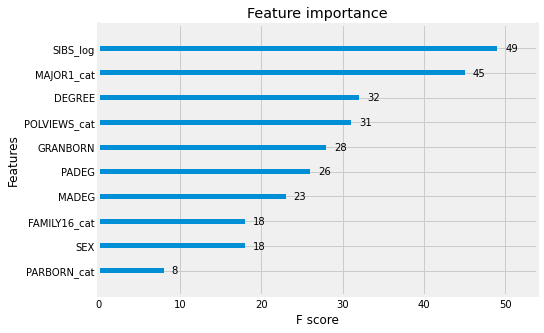

In [88]:
xg.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()